# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


In [22]:
import pandas as pd
dados = pd.read_excel('Recrutamento.xlsx')
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


**Inferência sobre a base de dados:**

Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target:** No nosso case a target é a coluna status.

In [23]:
set(dados.status)

{'No', 'Yes'}

Inferência sobre os dados:

Métricas de pontuação sobre ensino:
ssc_p
hsc_p
degree_p
estet_p
mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.


<Axes: >

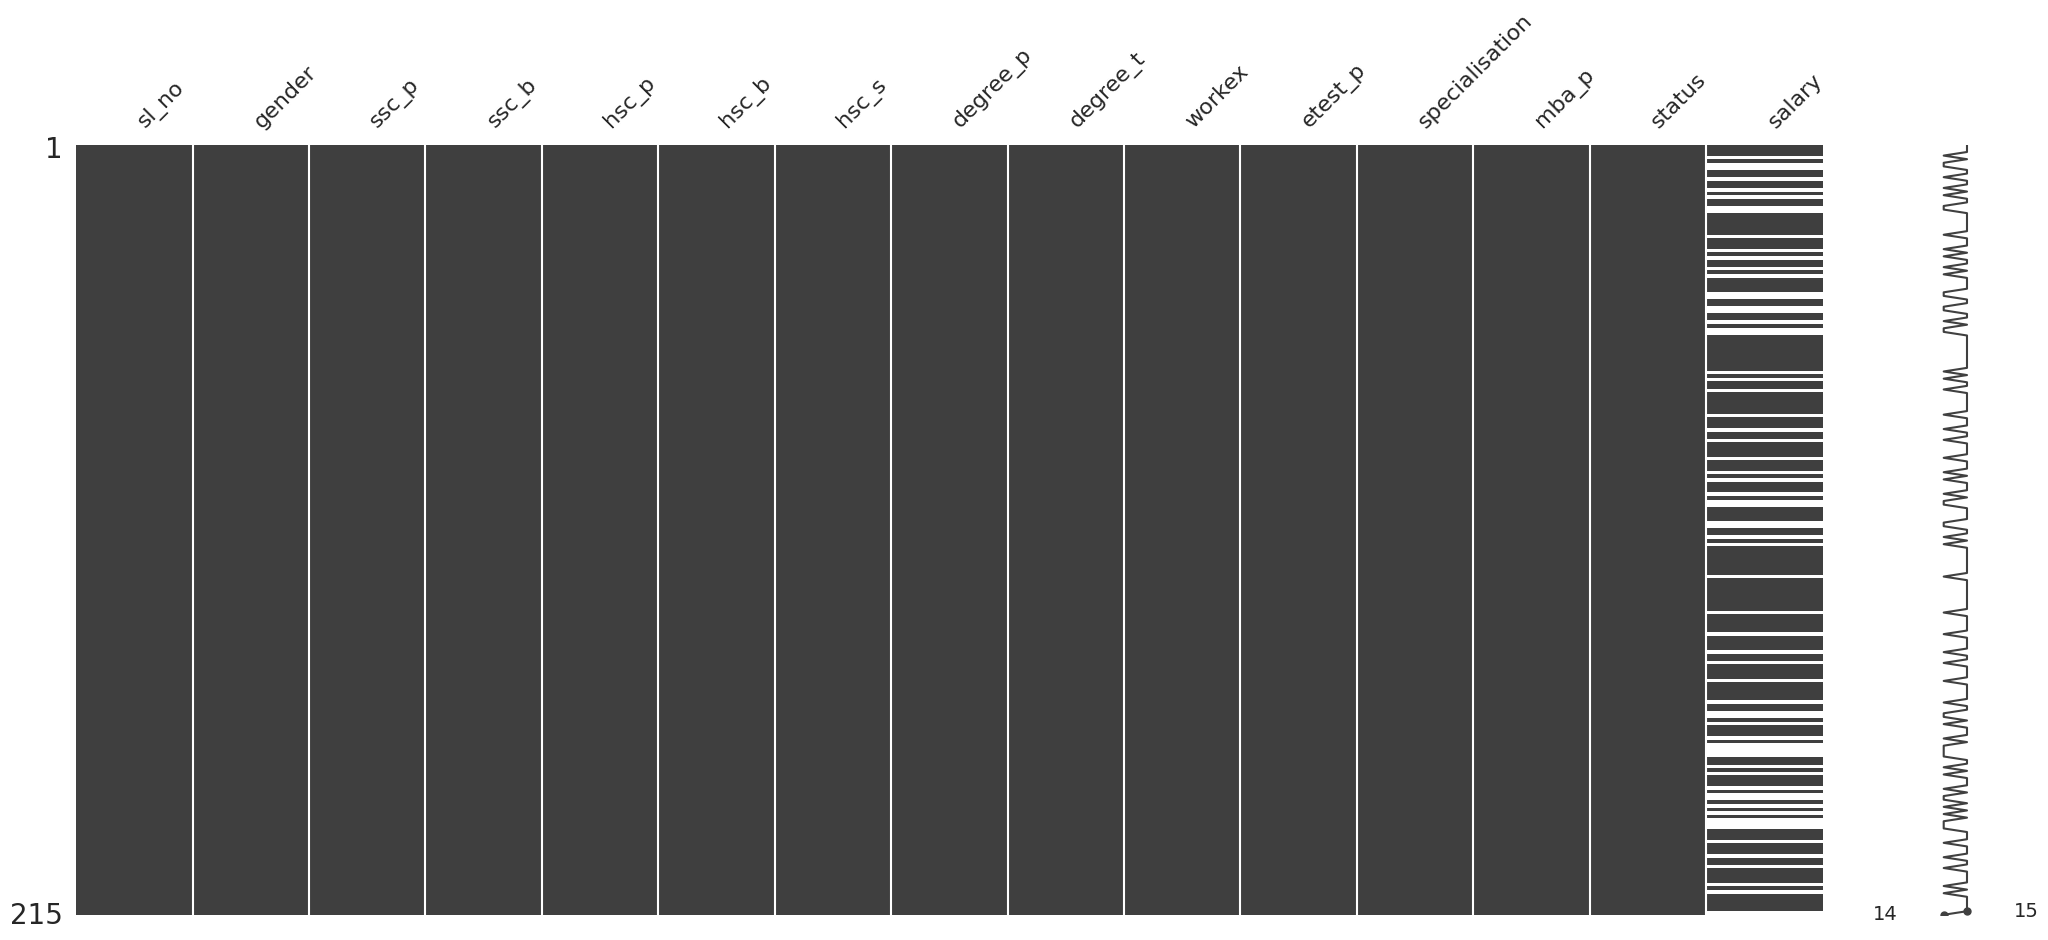

In [24]:
import missingno as msno 
msno.matrix(dados)

/tmp/ipykernel_1552289/3902121755.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='status', ylabel='salary'>

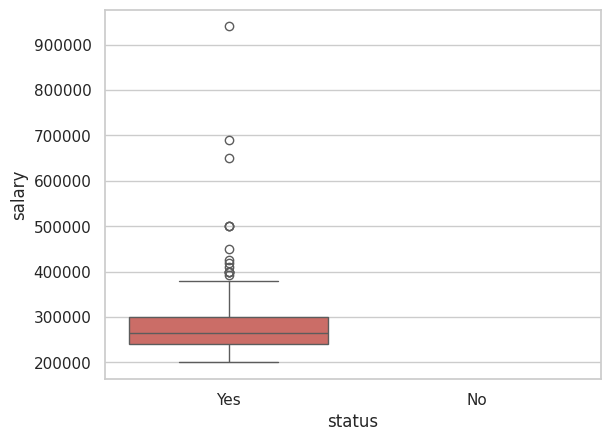

In [25]:
import seaborn as sb
sb.boxplot(x='status', y='salary', data=dados, palette='hls')

Inferência sobre os dados:

Observe que para a variável salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Como podemos realizar a tratativa dos valores nulos?

In [26]:
dados['salary'].fillna(value=0, inplace=True)
dados.isnull().sum()

/tmp/ipykernel_1552289/3045509609.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Analisando as variáveis numéricas: 

Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de ensino. Será que temos outliers na base?

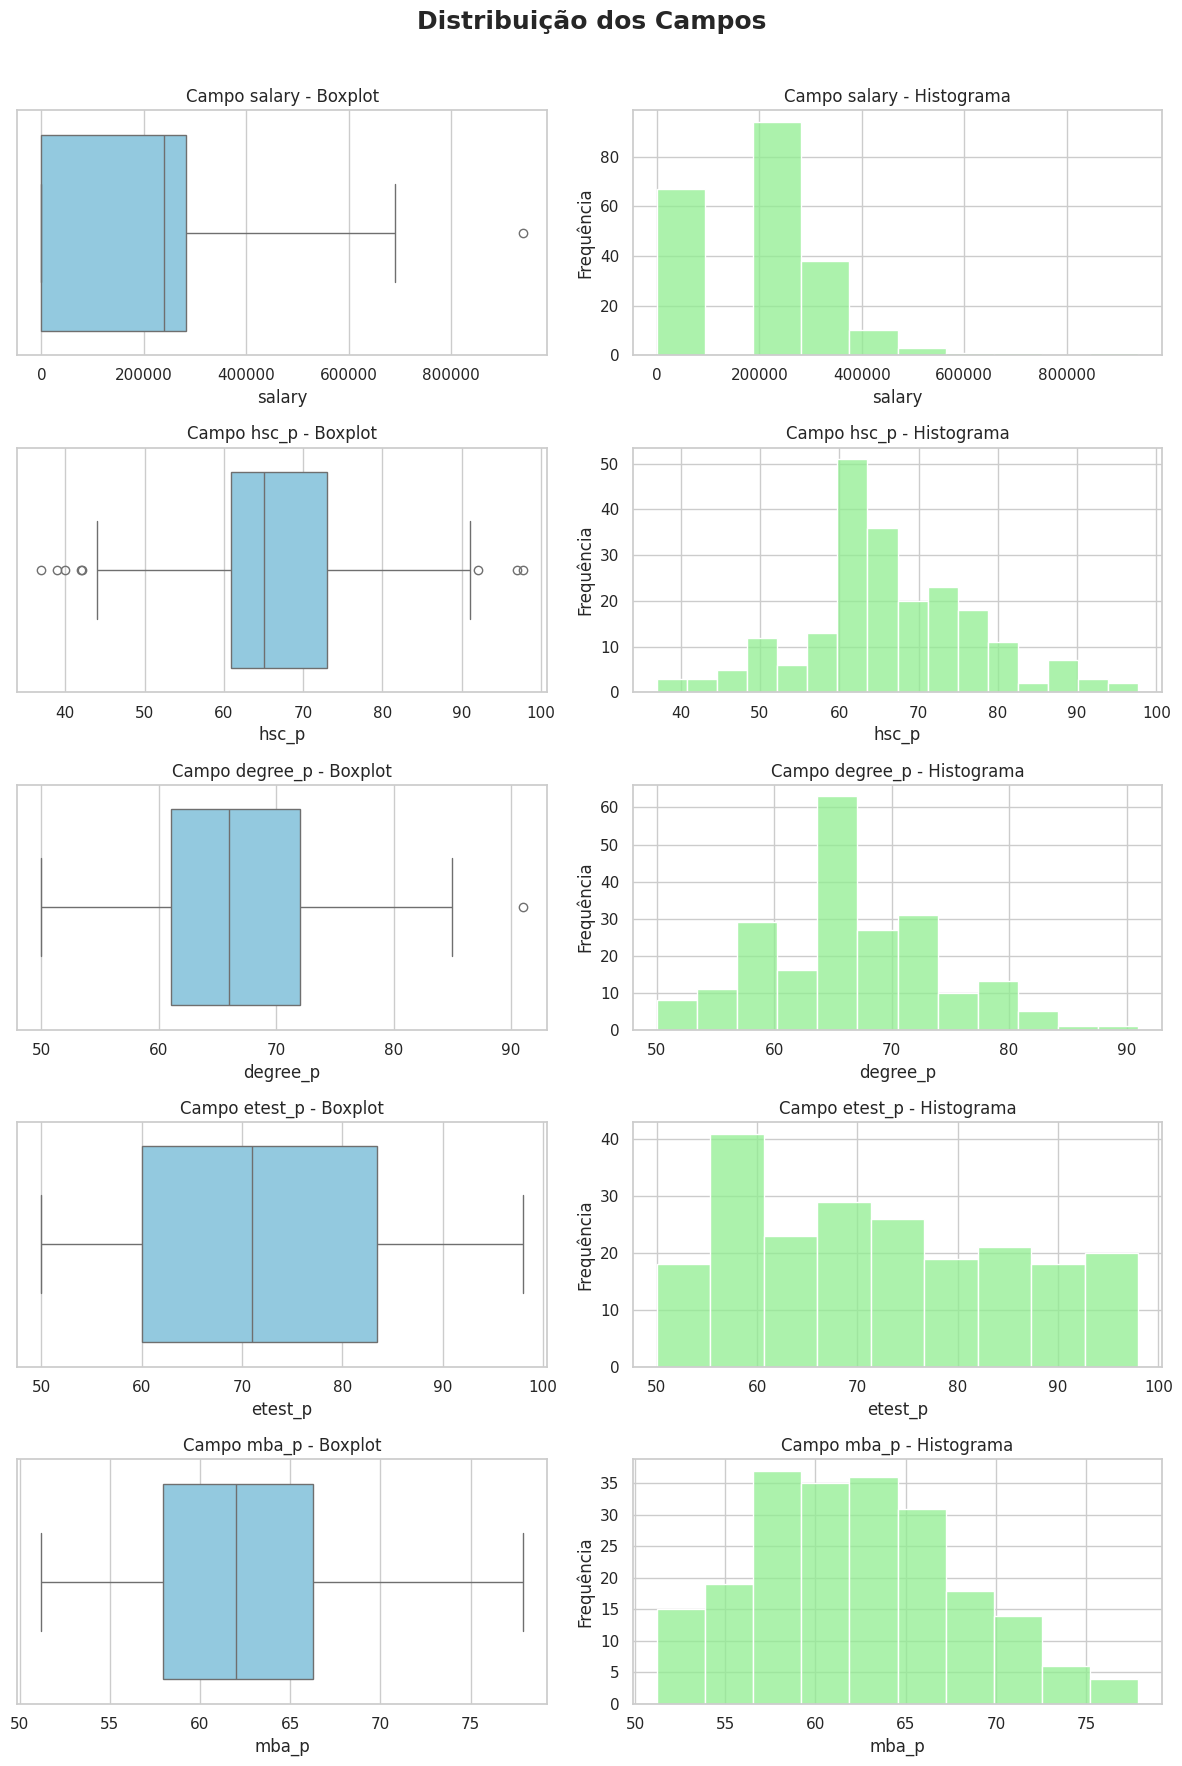

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

campos = [
    ("salary", ["boxplot", "histplot"]),
    ("hsc_p", ["boxplot", "histplot"]),
    ("degree_p", ["boxplot", "histplot"]),
    ("etest_p", ["boxplot", "histplot"]),
    ("mba_p", ["boxplot", "histplot"]),
]

fig, axs = plt.subplots(len(campos), 2, figsize=(12, 18))
fig.suptitle("Distribuição dos Campos", fontsize=18, weight='bold')

for i, (campo, plots) in enumerate(campos):
    # Boxplot
    sb.boxplot(x=dados[campo], ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f"Campo {campo} - Boxplot")
    axs[i, 0].set_xlabel(campo)
    axs[i, 0].set_ylabel("")

    # Histplot
    sb.histplot(data=dados, x=campo, ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f"Campo {campo} - Histograma")
    axs[i, 1].set_xlabel(campo)
    axs[i, 1].set_ylabel("Frequência")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

[Text(36.5, 0.5, '')]

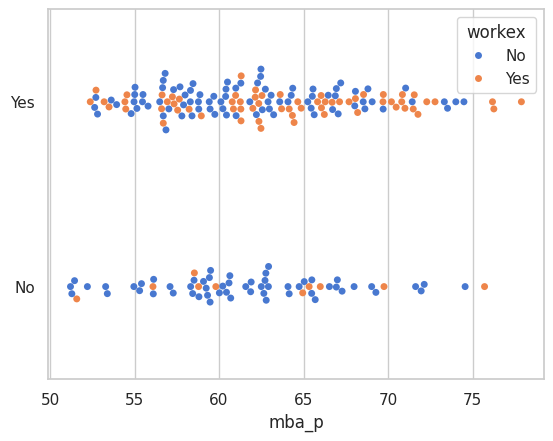

In [28]:
sb.set_theme(style="whitegrid", palette="muted")

ax = sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="")

In [29]:
from sklearn.preprocessing import LabelEncoder

colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()
print(colunas_categoricas)

label_encoder = LabelEncoder()
for col in colunas_categoricas:
    dados[col] = label_encoder.fit_transform(dados[col])

dummy_hsc_s=pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_coeded = pd.concat([dados,dummy_hsc_s,dummy_degree_t],axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
dados_coeded.head()


['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_0,dummy_1,dummy_2,dummy_0,dummy_1,dummy_2
0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


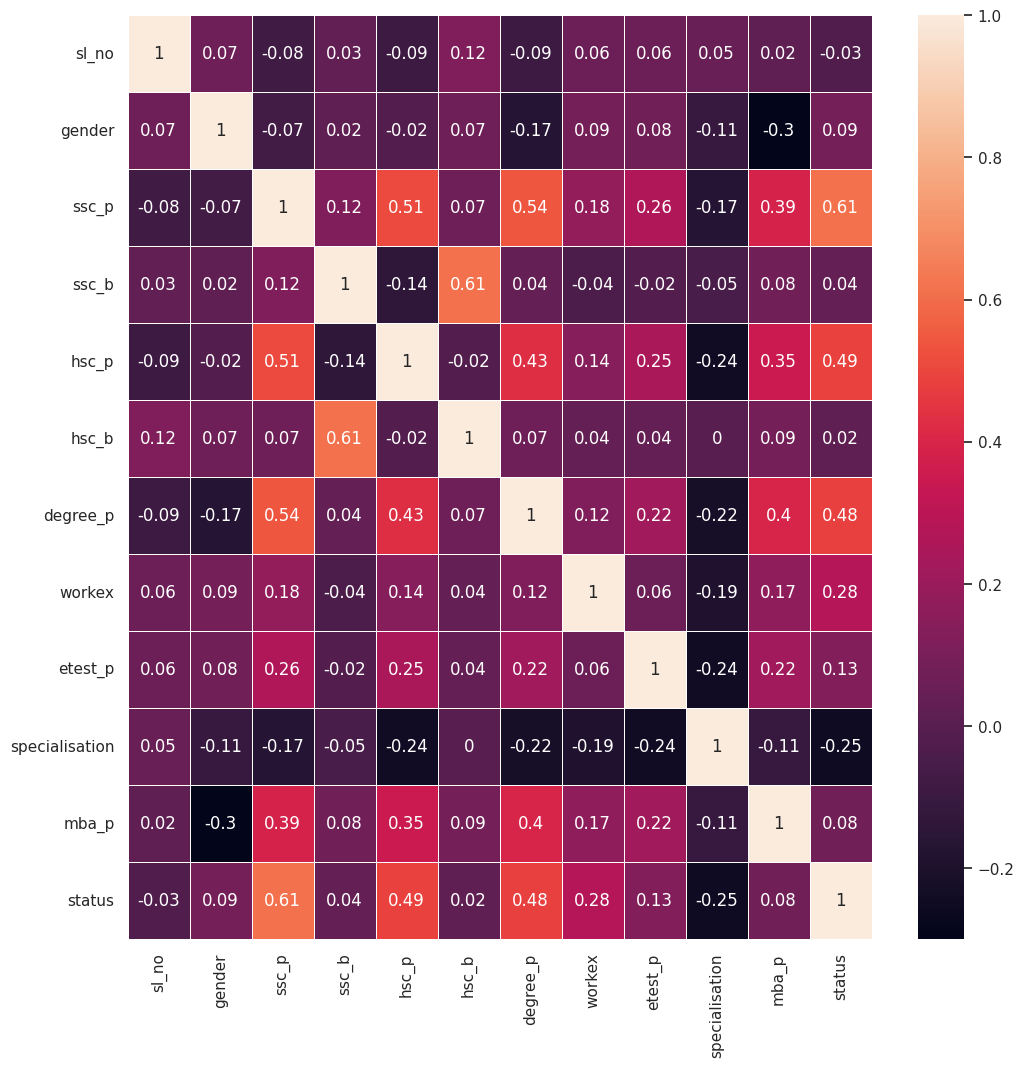

In [30]:

# Seleciona apenas as colunas numéricas para a matriz de correlação
dados_coeded_numerico = dados_coeded.select_dtypes(include=['number'])
correlation_matrix = dados_coeded_numerico.corr().round(2)

import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split #separação em treino e teste
from sklearn.neighbors import KNeighborsClassifier   #knn
from sklearn.preprocessing import StandardScaler, MinMaxScaler  


x = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

scaler = StandardScaler() 
#scaler = MinMaxScaler() 

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test) 

In [32]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train) 

KNeighborsClassifier()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_score = modelo_classificador.predict_proba(x_test_escalonado)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score) # false positive rate, true positive rate, thresholds
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


np.float64(0.8769230769230769)

AUC: 0.8769230769230769


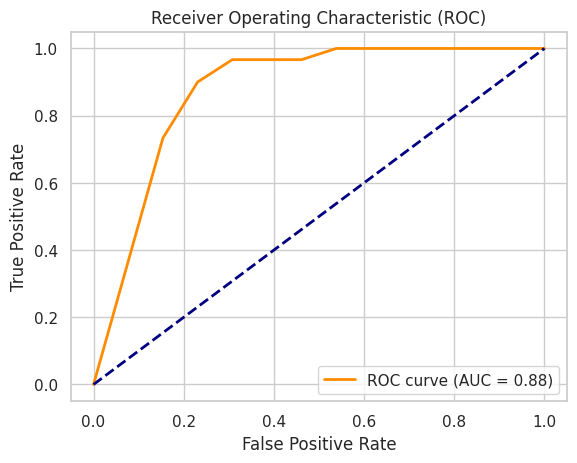

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()